In [56]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# allows you to display matplotlib plots directly in the notebook
%matplotlib inline
# Display all the columns of dataframe
pd.pandas.set_option('display.max_columns', None)

import seaborn as sns

In [57]:
#loading dataset
df = pd.read_csv('heart_disease_dataset.csv')

In [58]:
#shape of dataset
df.shape

(303, 14)

In [59]:
#first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


**Data Abbreviations**

`age`: Displays the age of the individual.

`sex`: Displays the gender of the individual using the following format : 1 = male 0 = female

`cp- Chest-pain type`: cp - chest pain type                                                                                 
             0: Typical angina: chest pain related decrease blood supply to the heart                                        
             1: Atypical angina: chest pain not related to heart                                                              
             2: Non-anginal pain: typically esophageal spasms (non heart related)                                              
             3: Asymptomatic: chest pain not showing signs of disease                                                          

`trestbps`- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). 
            anything above 130-140 is typically cause for concern.

`chol`- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

`fbs`- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.                               
       If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

`restecg`- Resting ECG : displays resting electrocardiographic results 
           0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

`thalach`- Max heart rate achieved : displays the max heart rate achieved by an individual.

`exang`- Exercise induced angina : 1 = yes 0 = no

`oldpeak`- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

`slope`- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 
            1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

`ca`- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

`thal` : Displays the thalassemia :                                                                           
         1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement excercising

`num` : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no;

In [60]:
# check the missing values
df.isnull().sum()>0

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [61]:
#value counts of both cases
df.info()
print("")
df["num"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



num
0    164
1    139
Name: count, dtype: int64

#### Counts assuring data is balanced for further EDA

In [62]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presnce'

In [63]:
# adding new column to dataset of converted data

df['heart_disease'] = df['num'].apply(heart_diseases)

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,presnce
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,presnce
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,presnce
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,presnce
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,presnce
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,presnce


#### Plottin the Bar Chart & Pie Chart of above using matplotlib and seaborn 

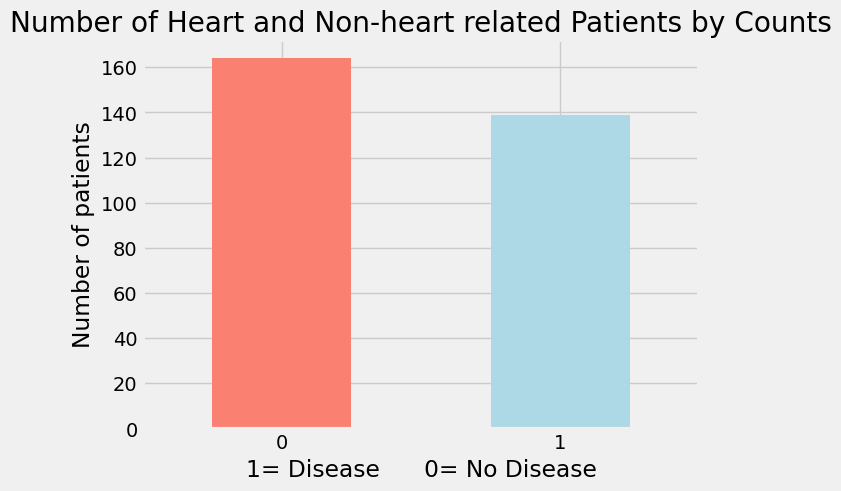

In [65]:
df["num"].value_counts().plot(kind="bar", color=["salmon", "lightblue"],label='_nolegend_');
plt.title("Number of Heart and Non-heart related Patients by Counts")
plt.xlabel("1= Disease      0= No Disease")
plt.ylabel("Number of patients")
plt.xticks(rotation=0);

In [66]:
dr = df.groupby('heart_disease')['num'].count()
dr

heart_disease
absence    164
presnce    139
Name: num, dtype: int64

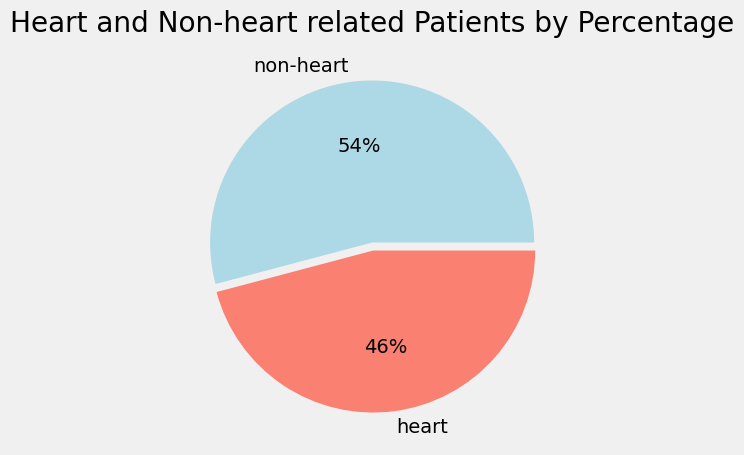

In [67]:
plt.figure(figsize=(5,5))
clrs = ['lightblue', 'salmon']
explode = [0, 0.05]
plt.pie(dr,labels=['non-heart','heart'], autopct='%0.0f%%', colors=clrs, explode=explode)
plt.title('Heart and Non-heart related Patients by Percentage')
plt.show()

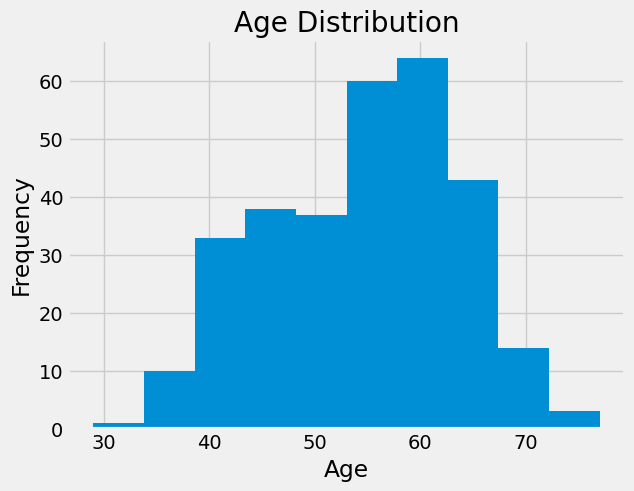

In [68]:
#Age distribution (histogram)
df.age.plot.hist()
plt.style.use('fivethirtyeight')
plt.title("Age Distribution")
plt.xlabel("Age");

In [69]:
# finding the minimum, maximum and average of the population age using statistical analysis

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

The minimum age is 29
The maximum age is 77
The average age is 54.44


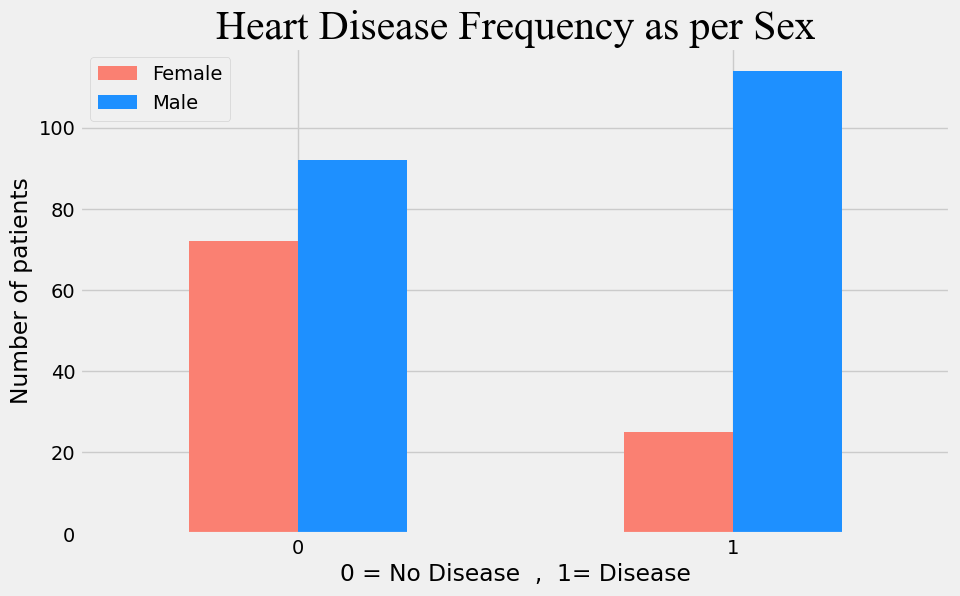

In [70]:
#Heart Disease Frequency as per Sex
pd.crosstab(df.num,df.sex).plot(kind="bar",figsize=(10,6),color=["Salmon","dodgerblue"])
font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Heart Disease Frequency as per Sex",fontdict=font1)
plt.xlabel("0 = No Disease  ,  1= Disease")
plt.ylabel("Number of patients")
plt.legend(["Female",'Male'])
plt.xticks(rotation=0);

### From above graph, it is observed that there are more number of males affected by heart diseases comparison to females.

In [71]:
def age_range(row):
    '''converting population age into range of age'''
    if row>=29 and row<40:
        return 'youngAge'
    elif row>=40 and row<55:
        return 'middleAge'
    else:
        return 'oldAge'    

In [72]:
# applying converted data into our dataset
df['ageRange'] = df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,ageRange
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,absence,oldAge
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,presnce,oldAge
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,presnce,oldAge
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,absence,youngAge
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,absence,middleAge


In [73]:
# converting numerical data into categorical data 

def _sex(row):
    if row==1:
        return 'male'
    else:
        return 'female'

In [86]:
#adding the gender coloumn for better understanding 
# applying converted data into our dataset
df['gender'] = df['sex'].apply(_sex)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,ageRange,gender
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,absence,oldAge,male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,presnce,oldAge,male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,presnce,oldAge,male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,absence,youngAge,male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,absence,middleAge,female


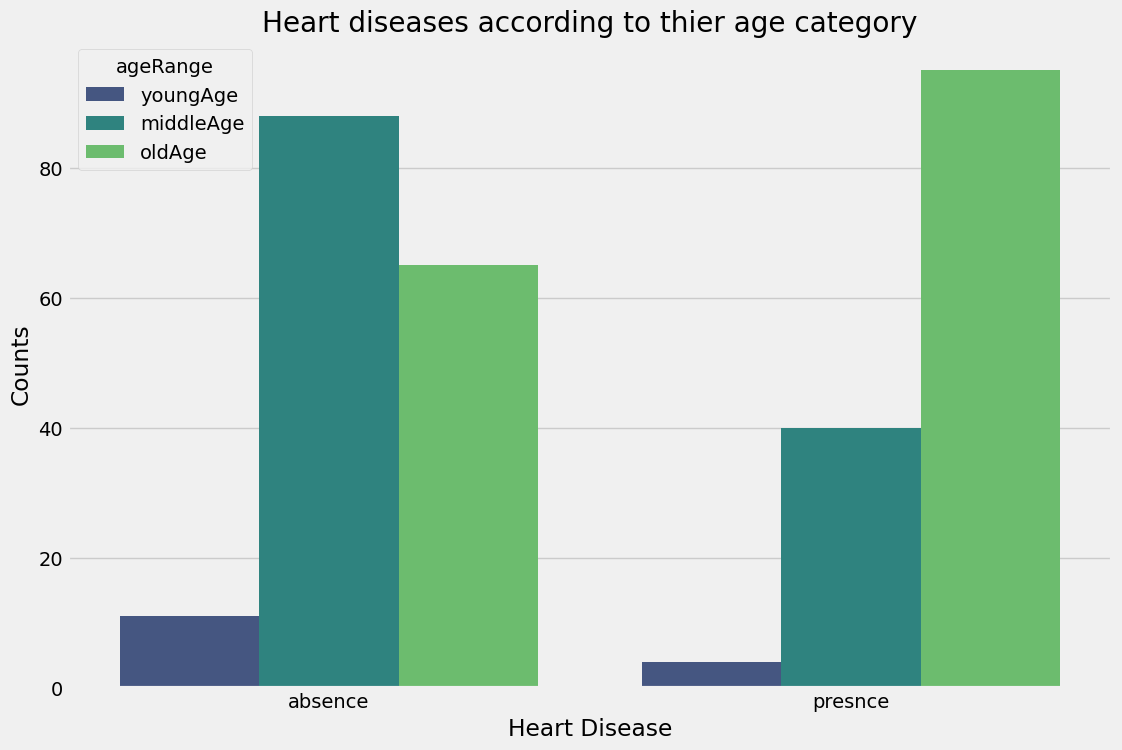

In [87]:
# count plot for heart diseases according to thier age category

plt.figure(figsize=(12,8))
hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Heart diseases according to thier age category")
sns.countplot(x='heart_disease', data=df, hue='ageRange',hue_order=hue_orders, palette='viridis')
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

### From above It can be concluded that heart diseases are most common in Old Age and young age are rarely affected

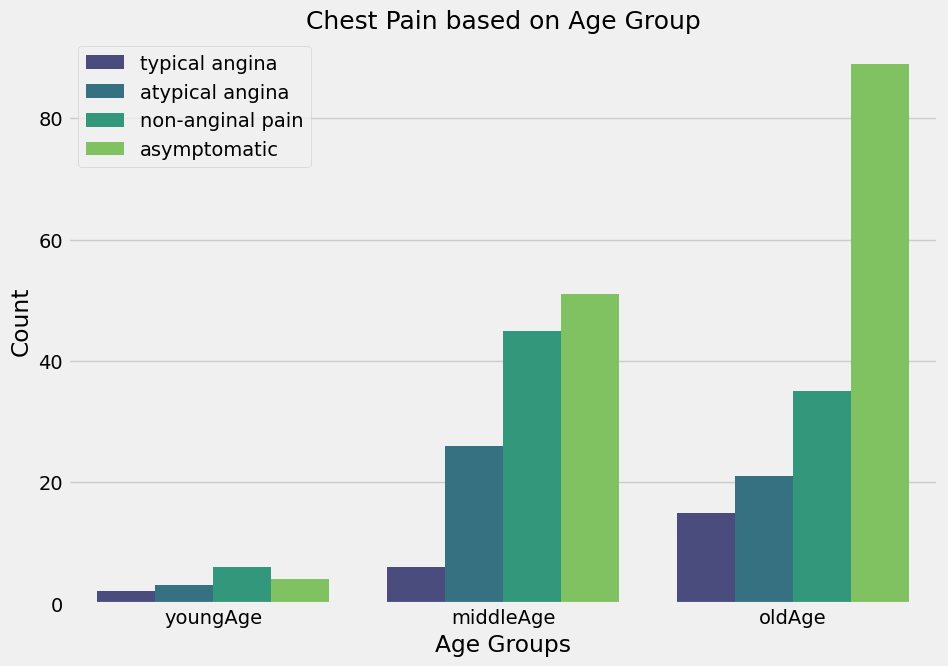

In [88]:
# Count plot for chest pain vs age group using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title("Chest Pain based on Age Group", fontsize=18)
sns.countplot(x=df['ageRange'], hue='cp', data=df, palette='viridis', order=['youngAge', 'middleAge', 'oldAge'])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

### Old age group have relatively very high asymptomatic chest pain.


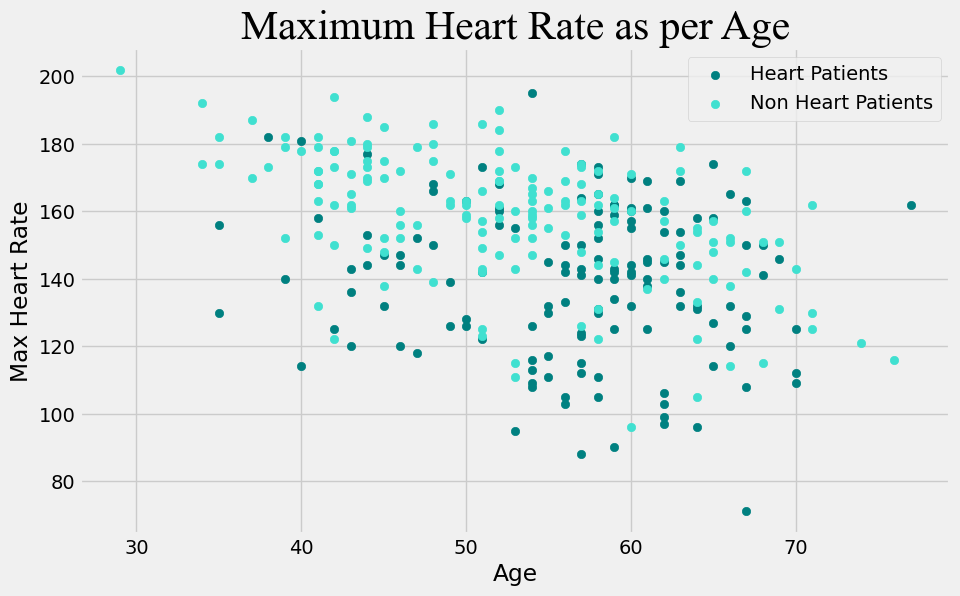

In [89]:
#heart rate as per age
plt.figure(figsize=(10,6))
# Age and heart of a non disease patient(target=1) 
plt.scatter(df.age[df.num==1],
            df.thalach[df.num==1],
            c="teal")

# Age and heart of a non disease patient(target=0)
plt.scatter(df.age[df.num==0],
            df.thalach[df.num==0],
            c="Turquoise");

font1 = {'family': 'Times New Roman',
         'color':  'Black',
         'weight': 'medium',
         'size':30}
plt.title("Maximum Heart Rate as per Age",fontdict=font1)
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Patients",'Non Heart Patients']);

### Heart Rate of patients becomes more dense and increased as per the  age

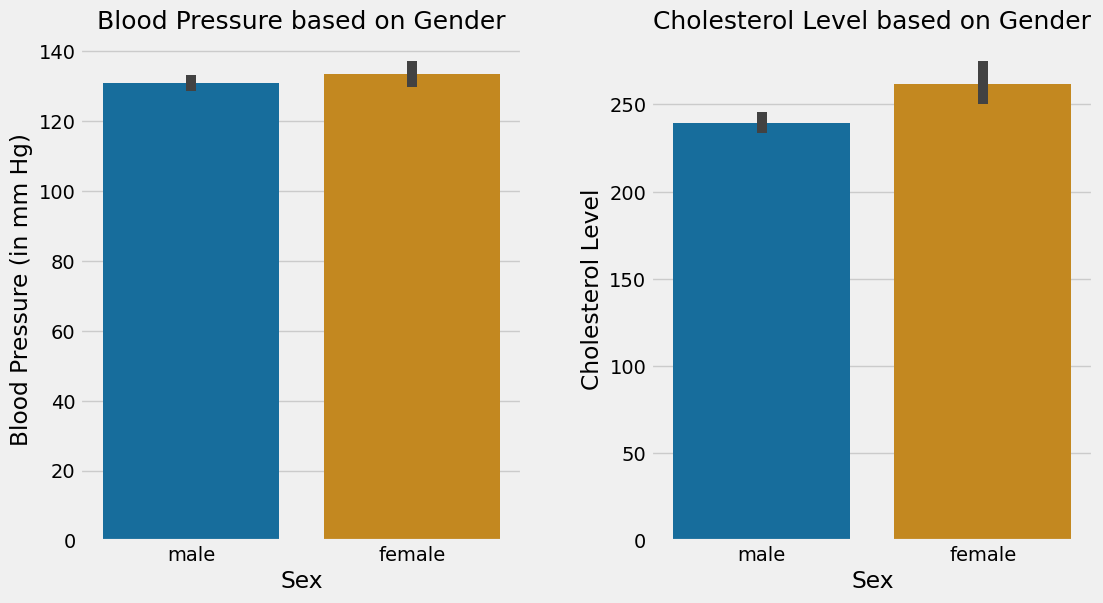

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Blood pressure plot
plt.subplot(1, 2, 1)
plt.title('Blood Pressure based on Gender', fontsize=18)
sns.barplot(x='gender', y='trestbps', data=df, palette='colorblind')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure (in mm Hg)')

# Cholesterol level plot
plt.subplot(1, 2, 2)
plt.title('Cholesterol Level based on Gender', fontsize=18)
sns.barplot(x='gender', y='chol', data=df, palette='colorblind')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')

# Adjust layout to prevent overlapping of titles
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()


### Observed that Blood Pressure is similar but Cholesterol is a bit higher in Females

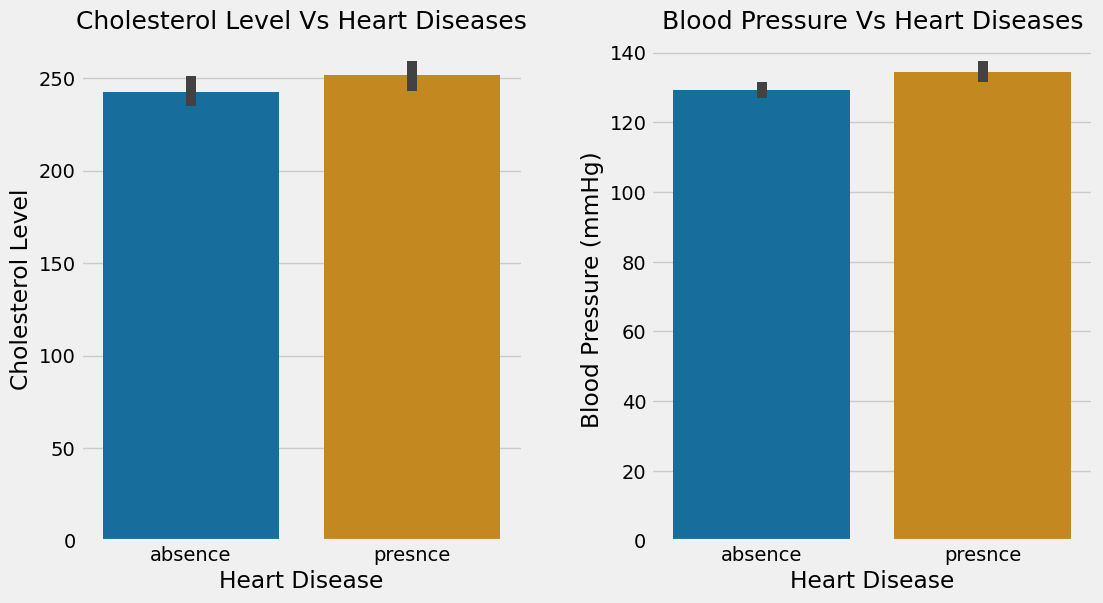

In [91]:

plt.figure(figsize=(12, 7))

# First subplot: Cholesterol level vs Heart diseases
plt.subplot(1, 2, 1)
plt.title('Cholesterol Level Vs Heart Diseases', fontsize=18)
sns.barplot(x='heart_disease', y='chol', data=df, palette='colorblind')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level')

# Second subplot: Blood pressure vs Heart diseases
plt.subplot(1, 2, 2)
plt.title('Blood Pressure Vs Heart Diseases', fontsize=18)
sns.barplot(x='heart_disease', y='trestbps', data=df, palette='colorblind')
plt.xlabel('Heart Disease')
plt.ylabel('Blood Pressure (mmHg)')

# Adjust layout to prevent overlapping of titles and add space between subplots
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

### Observed that High Blood Pressure and High Cholesterol both individually lead to heart diseases


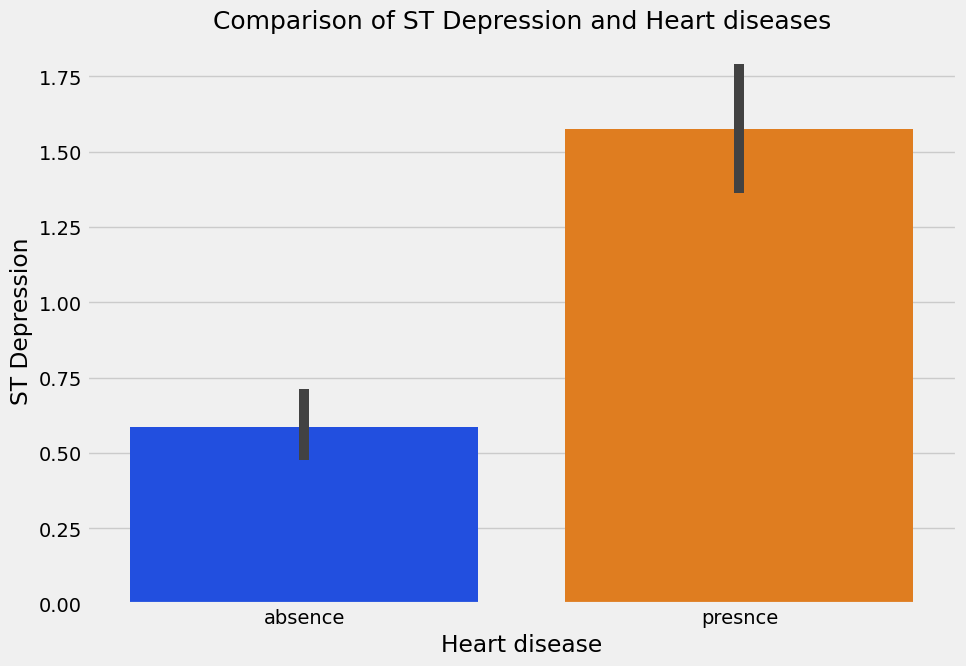

In [92]:
# Create a bar chart to compare ST Depression and Heart diseases using Matplotlib and Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.title('Comparison of ST Depression and Heart diseases', fontsize=18)
# Use Seaborn to create the bar plot
sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')
# Set the labels for the x and y axes
plt.xlabel('Heart disease')
plt.ylabel('ST Depression')

# Display the chart
plt.show()

### People having high ST depression have higher chances of having heart diseases

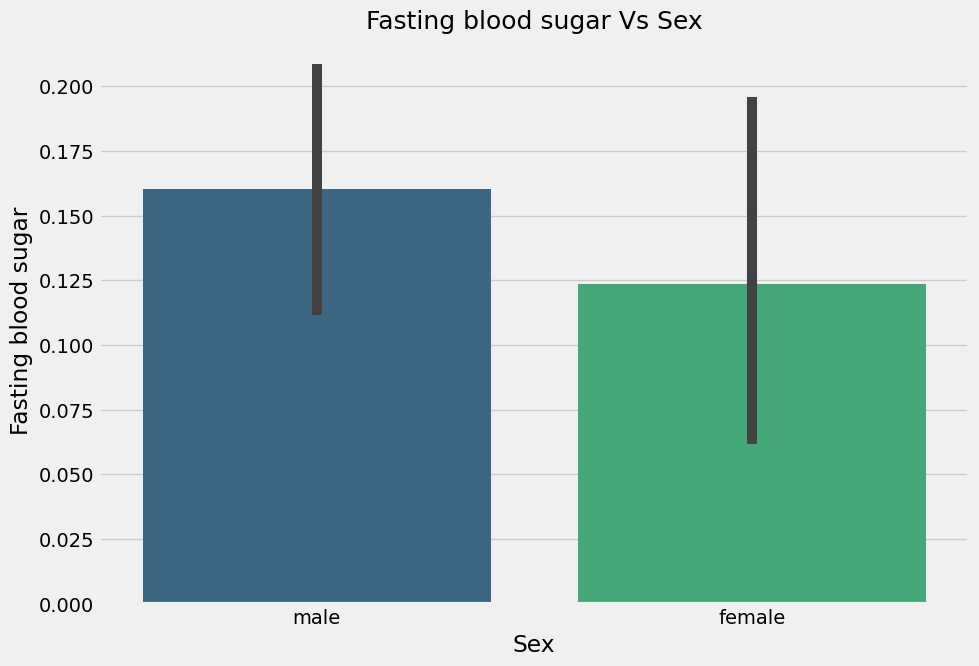

In [93]:
# Bar graph for Fasting blood sugar vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Fasting blood sugar Vs Sex', fontsize=18)
sns.barplot(x='gender', y='fbs', data=df, palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Fasting blood sugar')
plt.show()

### Observation: Males have high fasting blood pressure

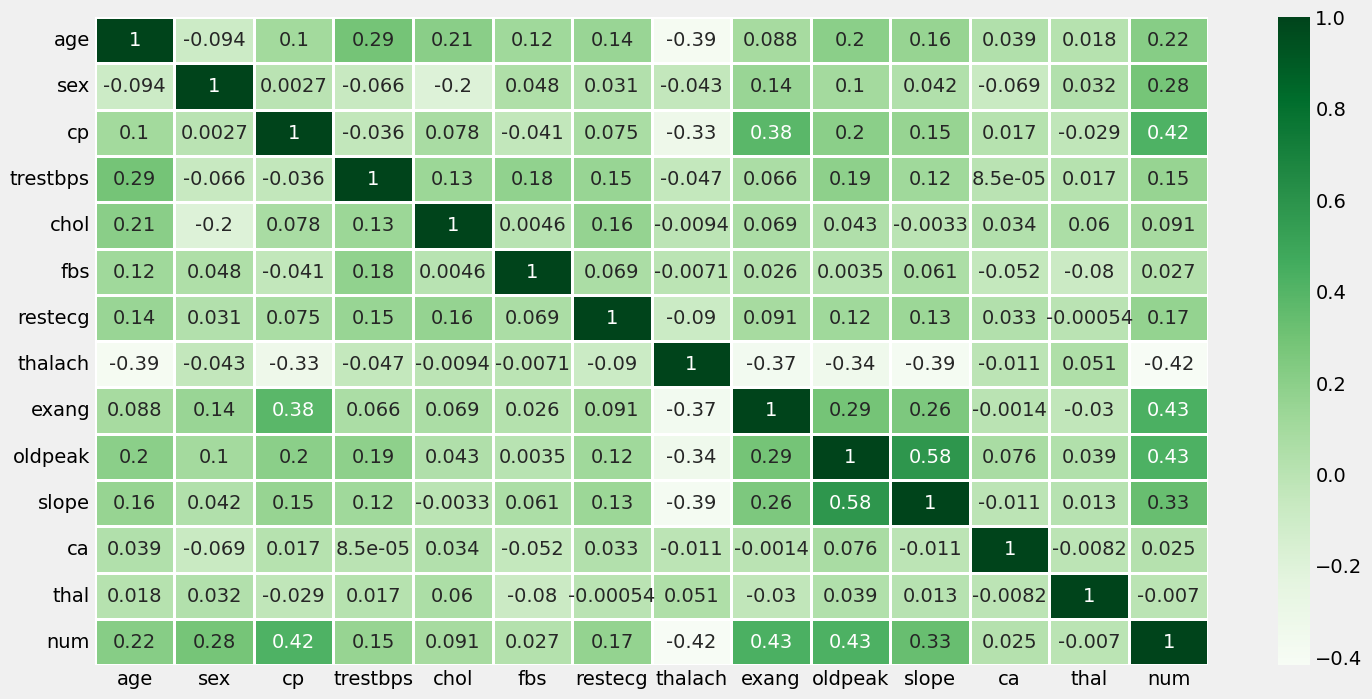

In [94]:
#Heatmap usng seaborn

plt.figure(figsize=(16,8))
df_copy=df.copy()
# Convert all non-numeric values to NaN in the DataFrame
df_copy = df_copy.apply(pd.to_numeric, errors='coerce')
# Remove the last 3 rows and columns from the DataFrame
df_trimmed = df_copy.iloc[:-3, :-3]

sns.heatmap(df_trimmed.corr(), annot=True, linewidths=2, linecolor='white', cmap="Greens");

In [95]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,ageRange,gender
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,absence,oldAge,male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,presnce,oldAge,male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,presnce,oldAge,male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,absence,youngAge,male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,absence,middleAge,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,presnce,middleAge,male
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,presnce,oldAge,male
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,presnce,oldAge,male
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,presnce,oldAge,female


In [98]:
# export the dataset as csv file for making dashboards in Power BI

# create a raw string by prefixing the string with an 'r'. 
#Raw strings interpret backslashes as literal characters and do not process escape sequences
df.to_csv(r"C:\Users\balun\My Python Stuff\heart-disease-project\data_final.csv")